In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.subplots as sp
import plotly.figure_factory as ff
from wordcloud import WordCloud
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/allapp.xlsx')

In [ ]:
df.keys()

Index(['PrimaryCitizenship', 'StatusinCanada', 'CurrentCountryofResidence',
       'EnglishProficiencyType', 'OverallScore', 'TestType',
       'ApplicationNumber', 'AssignedCollegeUser', 'ApplicationState',
       'ProgramChoiceRank', 'ProgramTitle', 'ProgramCode', 'CampusName',
       'ProgramTerm', 'ApplicationSubmitted', 'ApplicationResubmittedDate',
       'ScreeningStatus', 'OfferState', 'ProgramDecisionState', 'Conditions',
       'OfferDate', 'OfferAcceptedDate', 'PaidDate', 'Pre-RegistrationDate',
       'WithdrawReason', 'RevokeReason', 'OtherReason', 'DeferralOfferDate',
       'RefundOfferDate', 'Age'],
      dtype='object')

In [ ]:
df.shape

(69239, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69239 entries, 0 to 69238
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   PrimaryCitizenship          69239 non-null  object        
 1   StatusinCanada              69239 non-null  object        
 2   CurrentCountryofResidence   69239 non-null  object        
 3   EnglishProficiencyType      69239 non-null  object        
 4   OverallScore                65685 non-null  object        
 5   TestType                    66170 non-null  object        
 6   ApplicationNumber           69239 non-null  object        
 7   AssignedCollegeUser         69239 non-null  object        
 8   ApplicationState            69239 non-null  object        
 9   ProgramChoiceRank           61163 non-null  float64       
 10  ProgramTitle                69239 non-null  object        
 11  ProgramCode                 69239 non-null  object    

In [ ]:
print(df.isnull().sum())

PrimaryCitizenship                0
StatusinCanada                    0
CurrentCountryofResidence         0
EnglishProficiencyType            0
OverallScore                   3554
TestType                       3069
ApplicationNumber                 0
AssignedCollegeUser               0
ApplicationState                  0
ProgramChoiceRank              8076
ProgramTitle                      0
ProgramCode                       0
CampusName                        0
ProgramTerm                       0
ApplicationSubmitted              0
ApplicationResubmittedDate    64022
ScreeningStatus                   0
OfferState                     9539
ProgramDecisionState              0
Conditions                     9539
OfferDate                      9539
OfferAcceptedDate             18728
PaidDate                      33200
Pre-RegistrationDate          55712
WithdrawReason                54915
RevokeReason                  46354
OtherReason                   63301
DeferralOfferDate           

In [ ]:
df = df.sort_values(by='ApplicationNumber')

In [ ]:
df[df.duplicated(subset = 'ApplicationNumber', keep=False)].head(8).T

,8936,21070,6576,32729,3550,32850,33020,27248
PrimaryCitizenship,India,India,India,India,India,India,India,India
StatusinCanada,Study Permit / Student Visa,Study Permit / Student Visa,No status in Canada,No status in Canada,No status in Canada,No status in Canada,No status in Canada,No status in Canada
CurrentCountryofResidence,India,India,India,India,India,India,India,India
EnglishProficiencyType,Tests Completed,Tests Completed,Tests Completed,Tests Completed,Tests Completed,Tests Completed,Tests Completed,Tests Completed
OverallScore,6.0,6.0,6.5,6.5,6.5,6.5,6.5,6.5
TestType,IELTS,IELTS,IELTS,IELTS,IELTS,IELTS,IELTS,IELTS
ApplicationNumber,X1596515,X1596515,X1596542,X1596542,X1596547,X1596547,X1596554,X1596554
AssignedCollegeUser,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned
ApplicationState,Closed,Closed,Review,Review,Review,Review,Review,Review
ProgramChoiceRank,1.0,NaN,1.0,2.0,2.0,1.0,2.0,1.0


In [ ]:
df['PrimaryCitizenship'].unique()

array(['India', 'Colombia', 'Lebanon', 'Jamaica', 'Bangladesh', 'Nigeria',
       'Viet Nam', 'China', 'Kenya', 'Iran, Islamic Republic Of',
       'Cameroon', 'Mexico', 'Korea, Republic Of', 'South Africa',
       'Myanmar', 'Palestinian Territory, Occupied',
       'Congo, The Democratic Republic Of The', 'Pakistan', 'Jordan',
       'Rwanda', 'Israel', 'Greece', 'United States', 'Sri Lanka',
       'Romania', 'Bahamas', 'Libya', 'El Salvador', 'Afghanistan',
       'Brazil', 'Gambia', 'Ghana', 'Mauritius', 'Saudi Arabia', 'Chile',
       'Philippines', 'Mongolia', 'Morocco', 'Antigua And Barbuda',
       'Indonesia', 'Australia', 'Japan', 'Burundi', 'Nepal', 'Liberia',
       'Egypt', 'Taiwan', 'Venezuela', 'Turkey', 'Iraq', 'Yemen',
       'Albania', 'Russian Federation', 'Peru', 'Syrian Arab Republic',
       'Cuba', 'United Kingdom', 'Haiti', 'Ethiopia', 'Chad', 'Italy',
       'Nicaragua', 'Ukraine', 'Germany', 'Mauritania', 'Iceland',
       'Uganda', 'Turkmenistan', 'Togo', 'M

In [ ]:
# Group the DataFrame by the 'CountryOfBirth' column and count occurrences
country_counts = df.groupby('PrimaryCitizenship').size().reset_index(name='Count')


           PrimaryCitizenship  Count
50                      India  63692
23                      China   1122
83                    Nigeria    556
11                 Bangladesh    397
59                     Jordan    276
24                   Colombia    276
85                   Pakistan    248
38                     Gambia    212
52  Iran, Islamic Republic Of    173
90                Philippines    159


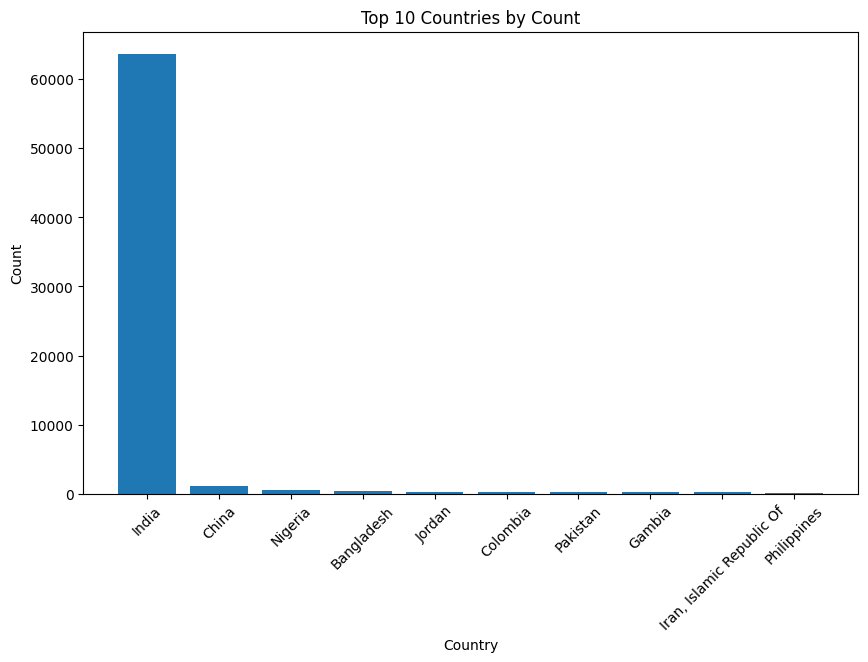

In [ ]:
import matplotlib.pyplot as plt

# Sort the DataFrame by the 'Count' column in descending order
sorted_country_counts = country_counts.sort_values(by='Count', ascending=False)

# Get the top 10 countries
top_10_countries = sorted_country_counts.head(10)

# Print the top 10 countries
print(top_10_countries)

# Assuming you have the 'top_10_countries' DataFrame
top_10_countries = sorted_country_counts.head(10)

# Extract the country names and counts
countries = top_10_countries['PrimaryCitizenship']
counts = top_10_countries['Count']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(countries, counts)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries by Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


In [ ]:
# Group the DataFrame by the 'StatusinCanada' column and count occurrences
StatusinCanada = df.groupby('StatusinCanada').size().reset_index(name='Count')


                               StatusinCanada  Count
1                         No status in Canada  65571
4                 Study Permit / Student Visa   2411
2                                       Other   1027
0  In Canada on the authority of another Visa    201
3              Refugee Status (i.e. Claimant)     29


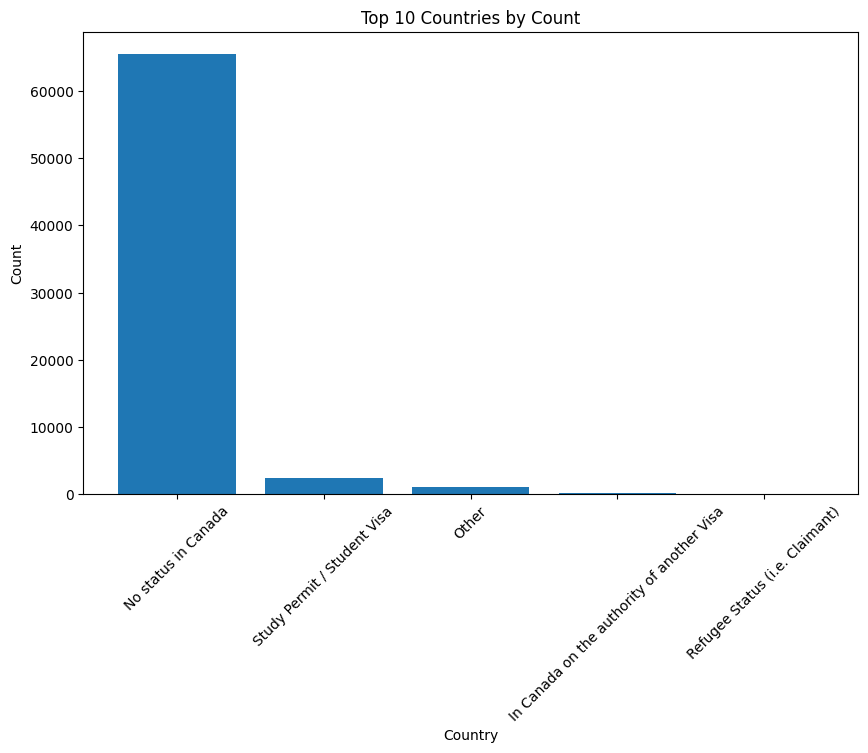

In [ ]:
import matplotlib.pyplot as plt

# Sort the DataFrame by the 'Count' column in descending order
sorted_StatusinCanada = StatusinCanada.sort_values(by='Count', ascending=False)

# Get the top 10 countries
top_10_StatusinCanada = sorted_StatusinCanada.head(10)

# Print the top 10 countries
print(top_10_StatusinCanada)

# Assuming you have the 'top_10_countries' DataFrame
top_10_StatusinCanada = sorted_StatusinCanada.head(10)

# Extract the country names and counts
status = top_10_StatusinCanada['StatusinCanada']
counts = top_10_StatusinCanada['Count']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(status, counts)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries by Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


In [ ]:
df.keys()

Index(['PrimaryCitizenship', 'StatusinCanada', 'CurrentCountryofResidence',
       'EnglishProficiencyType', 'OverallScore', 'TestType',
       'ApplicationNumber', 'AssignedCollegeUser', 'ApplicationState',
       'ProgramChoiceRank', 'ProgramTitle', 'ProgramCode', 'CampusName',
       'ProgramTerm', 'ApplicationSubmitted', 'ApplicationResubmittedDate',
       'ScreeningStatus', 'OfferState', 'ProgramDecisionState', 'Conditions',
       'OfferDate', 'OfferAcceptedDate', 'PaidDate', 'Pre-RegistrationDate',
       'WithdrawReason', 'RevokeReason', 'OtherReason', 'DeferralOfferDate',
       'RefundOfferDate', 'Age'],
      dtype='object')

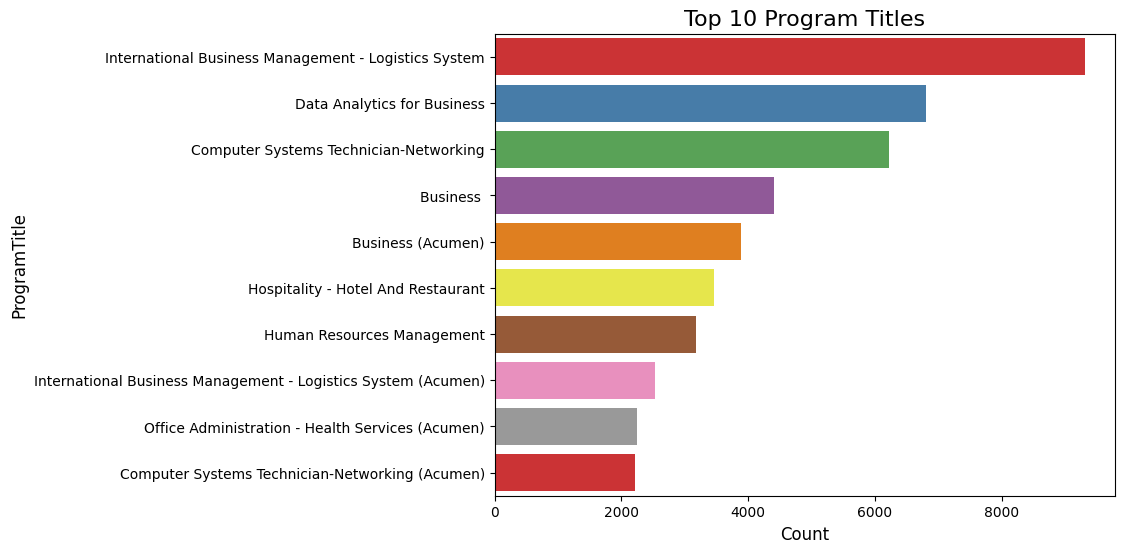

In [ ]:
# Create a countplot for the 'ProgramTitle' column and assign it to the y-axis
plt.figure(figsize=(8, 6))

# Assuming you have already created a DataFrame named 'df'
# Use the 'value_counts' method to get the counts for each 'ProgramTitle'
top_programs = df['ProgramTitle'].value_counts().head(10)

sns.countplot(y='ProgramTitle', data=df, order=top_programs.index, palette='Set1')

# Set the x-axis and y-axis labels
plt.xlabel('Count', fontsize=12)
plt.ylabel('ProgramTitle', fontsize=12)

# Set the title and show the plot
plt.title('Top 10 Program Titles', fontsize=16)
plt.show()

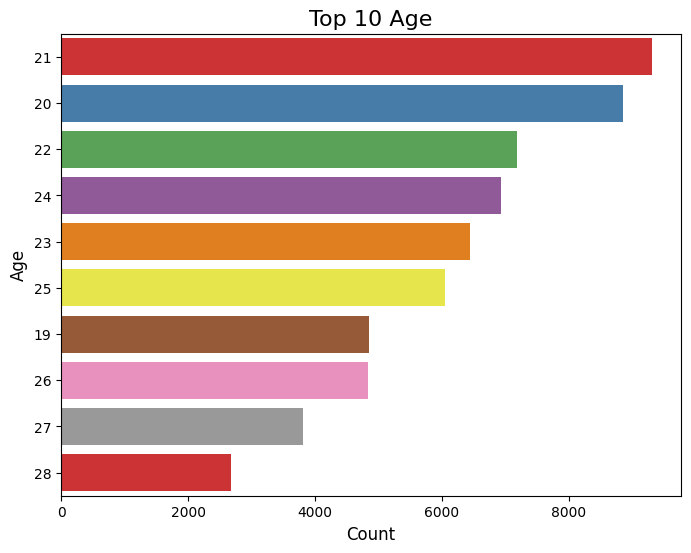

In [ ]:
# Create a countplot for the 'ProgramTitle' column and assign it to the y-axis
plt.figure(figsize=(8, 6))

# Assuming you have already created a DataFrame named 'df'
# Use the 'value_counts' method to get the counts for each 'ProgramTitle'
top_age = df['Age'].value_counts().head(10)

sns.countplot(y='Age', data=df, order=top_age.index, palette='Set1')

# Set the x-axis and y-axis labels
plt.xlabel('Count', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Set the title and show the plot
plt.title('Top 10 Age', fontsize=16)
plt.show()

In [ ]:
def categorical_charts(df, columns):
    for column in columns:
        # Count the occurrences of each category
        category_counts = df[column].value_counts()

        # Create a pie chart using Plotly
        trace = go.Pie(labels=category_counts.index, values=category_counts.values, name=column)
        layout = go.Layout(title=f'Distribution of {column} (Pie Chart)')
        fig = go.Figure(data=[trace], layout=layout)

        # Display the Plotly figure
        py.iplot(fig)

In [ ]:
cat_cols = df.select_dtypes(include=['object'])

In [ ]:
#categorical_charts(df, cat_cols)

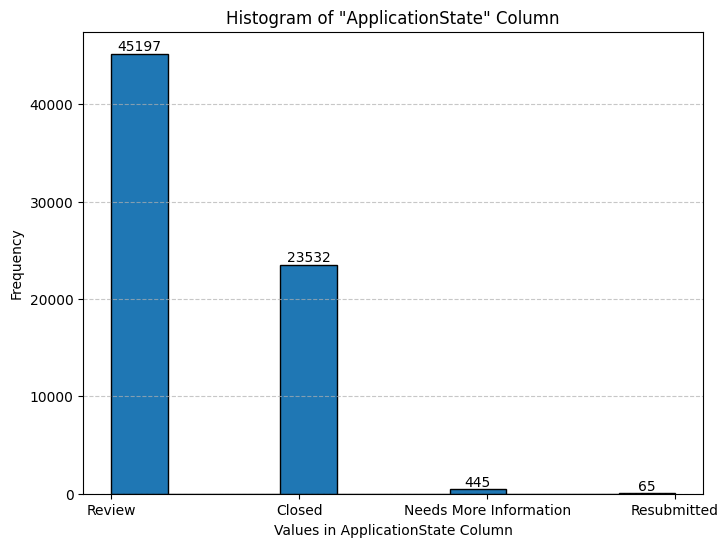

In [ ]:
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(df['ApplicationState'], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Values in ApplicationState Column')
plt.ylabel('Frequency')
plt.title('Histogram of "ApplicationState" Column')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add counts on top of the bars
for count, x in zip(n, bins):
    if count > 0:
        plt.text(x + 0.15, count, str(int(count)), ha='center', va='bottom')
plt.show()

In [ ]:
df.keys()

Index(['PrimaryCitizenship', 'StatusinCanada', 'CurrentCountryofResidence',
       'EnglishProficiencyType', 'OverallScore', 'TestType',
       'ApplicationNumber', 'AssignedCollegeUser', 'ApplicationState',
       'ProgramChoiceRank', 'ProgramTitle', 'ProgramCode', 'CampusName',
       'ProgramTerm', 'ApplicationSubmitted', 'ApplicationResubmittedDate',
       'ScreeningStatus', 'OfferState', 'ProgramDecisionState', 'Conditions',
       'OfferDate', 'OfferAcceptedDate', 'PaidDate', 'Pre-RegistrationDate',
       'WithdrawReason', 'RevokeReason', 'OtherReason', 'DeferralOfferDate',
       'RefundOfferDate', 'Age'],
      dtype='object')

In [ ]:
df['ProgramTerm'].unique()


array(['Fall 2019', 'Winter 2020', 'Fall 2021', 'Fall 2020',
       'Spring 2020', 'Winter 2021', 'Spring 2019', 'Spring 2021',
       'Winter 2022'], dtype=object)

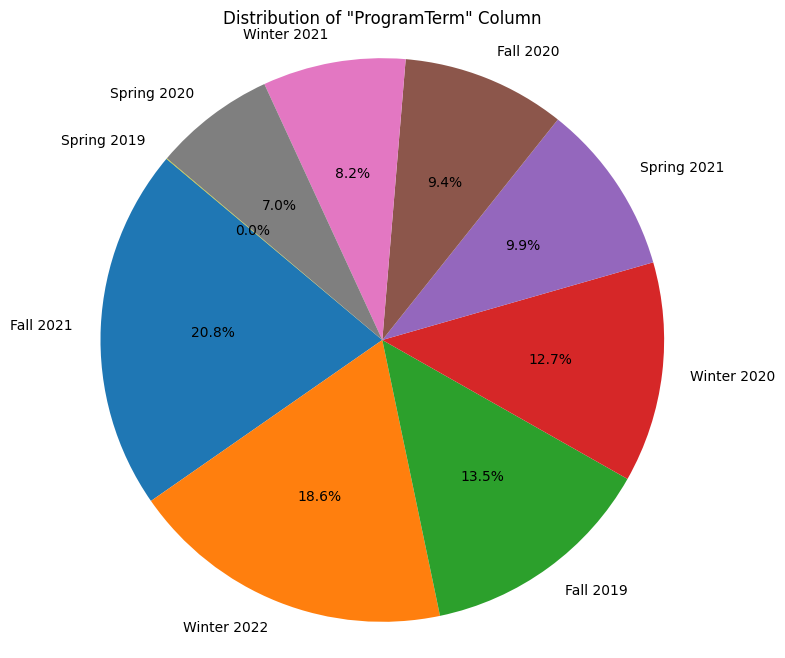

In [ ]:
term_counts = df['ProgramTerm'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(term_counts, labels=term_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of "ProgramTerm" Column')
plt.show()

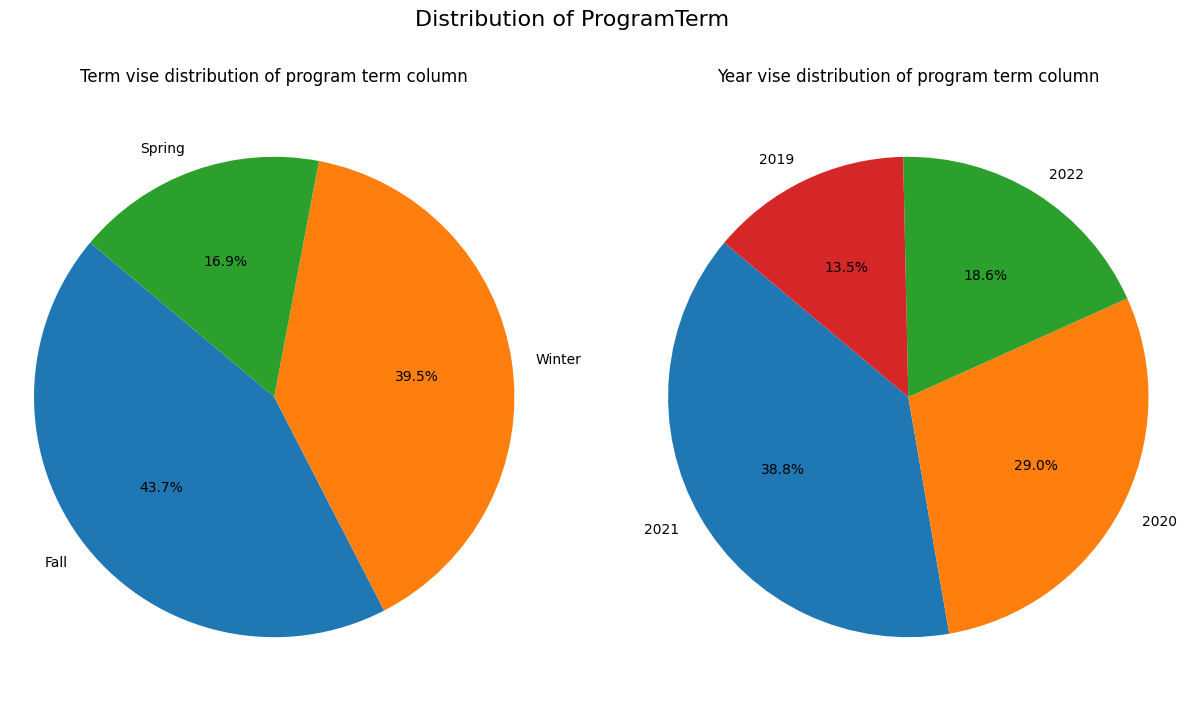

In [ ]:
year = df['ProgramTerm'].str.split().str[1]
term = df['ProgramTerm'].str.split().str[0]
term_counts = term.value_counts()
year_counts = year.value_counts()

# Create subplots with a 1x2 grid (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.pie(term_counts, labels=term_counts.index, autopct='%1.1f%%', startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Term vise distribution of program term column')

ax2.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Year vise distribution of program term column')


# Add an overall title to the entire figure
fig.suptitle('Distribution of ProgramTerm', fontsize=16)

# Display the chart
plt.show()


In [ ]:
replace_dict = {
    'St. Clair College at Acumen Mississauga': 'Acumen Campus',
    'St. Clair College at Acumen Toronto': 'Acumen Campus',
    'St. Clair College Centre for the Arts': 'Downtown Campus',
    'One Riverside Dr': 'Downtown Campus',
    'Media Plex': 'Downtown Campus',
    'Windsor': 'South Campus',
    'South Campus ': 'South Campus'
}
df['CampusName'] = df['CampusName'].replace(replace_dict)

In [ ]:
df['CampusName'].unique()

array(['South Campus', 'Downtown Campus', 'Chatham Campus',
       'Acumen Campus'], dtype=object)

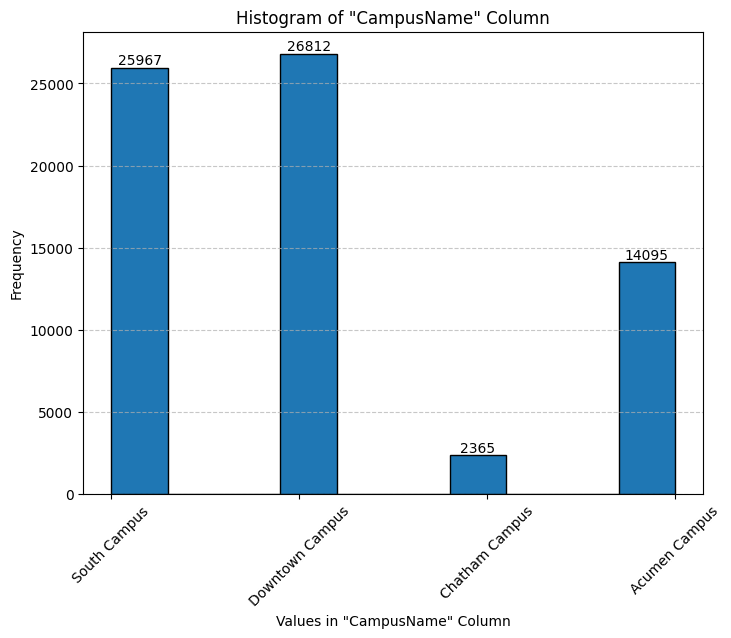

In [ ]:
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(df['CampusName'], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Values in "CampusName" Column')
plt.ylabel('Frequency')
plt.title('Histogram of "CampusName" Column')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add counts on top of the bars
for count, x, patch in zip(n, bins, patches):
    if count > 0:
        plt.text(x + (bins[1] - bins[0]) / 2, count, str(int(count)), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69239 entries, 19458 to 46845
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   PrimaryCitizenship          69239 non-null  object        
 1   StatusinCanada              69239 non-null  object        
 2   CurrentCountryofResidence   69239 non-null  object        
 3   EnglishProficiencyType      69239 non-null  object        
 4   OverallScore                65685 non-null  object        
 5   TestType                    66170 non-null  object        
 6   ApplicationNumber           69239 non-null  object        
 7   AssignedCollegeUser         69239 non-null  object        
 8   ApplicationState            69239 non-null  object        
 9   ProgramChoiceRank           61163 non-null  float64       
 10  ProgramTitle                69239 non-null  object        
 11  ProgramCode                 69239 non-null  object

In [ ]:
df.to_csv('allapps.csv')